In [183]:
import pandas as pd
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

In [343]:
def seir(t, x, a):
    #S, E, I, Q, R, D, V = x
    S = x[0]
    E = x[1]
    I = x[2]
    Q = x[3]
    R = x[4]
    D = x[5]
    V = x[6]
    N = sum(x)
    #Vaccination rate is vaccinated/population/days
    v = 0.00018 # New births and new residents
    b2 = 8.58 * 10**-9 #Transmission rate before intervention
    #b2 = 3.43 * 10**-9 #Transmission rate during and after intervention
    a = a
    u = 3 * 10**-5 #Natural death rate
    gamma = 1/5.5 #Incubation period
    sigma = 0.05 #Vaccine inefficacy
    delta = 1/3.8 #Infection time
    k = 0.014 #Case fatality rate
    lamb = 1/10. #Recovery time
    p = 1/15. #Time until death
    dx = np.zeros(7)
    dx[0] = v * N  - b2 * S * I - a * S - u * S #S
    dx[1] = b2 * S * I - gamma * E + sigma * b2 * V * I - u * E #E
    dx[2] = gamma * E - delta * I - u * I #I
    dx[3] = delta * I - (1-k) * lamb * Q - k * p * Q - u * Q #Q
    dx[4] = (1 - k) * lamb * Q - u * R #R
    dx[5] = k * p * Q #D
    dx[6] = a * S - sigma * b2 * V * I - u * V #V
    return dx

In [544]:
def combinedSeir(t, x, a, days):
    S = x[0]
    E = x[1]
    Ia = x[2]
    Is = x[3]
    R = x[4]
    P = x[5]
    b = 0.00018
    u = 4.563 * 10**-5
    up = 0.1724
    a1 = 0.5
    b1 = 0.00414
    b2 = 0.0115
    delta = 0.7
    W = 0.0051
    w = 0.09
    sigma = 0.0018
    gammas = 0.0714
    gammaa = 0.0714
    ns = 0.1
    na = 0.05
    a = float(a / sum(x) / days)
    z = 1/182.
    dx = np.zeros(6)
    dx[0] = b - ((b1*S*P)/(1+(a1*P))) - ((b2*S*(Ia + Is))/(1+(a1*(Ia + Is)))) + (W*E) - (u*S) - (.95 * a * S) + (z * R) #S
    dx[1] = ((b1*S*P)/(1+(a1*P))) + ((b2*S*(Ia + Is))/(1+(a1*(Ia + Is)))) - (W*E) - (u*E) - (w*E) #E
    dx[2] = ((1-delta)*w*E) - ((u + sigma)*Ia) - (gammaa * Ia) #Ia
    dx[3] = (delta * w * E) - ((u + sigma)*Is) - (gammas * Is) #Is
    dx[4] = (gammas * Is) + (gammaa * Ia) - (u * R) - (z * R) #R
    dx[5] = (na * Ia) + (ns * Is) - (up * P) #P
    return dx

In [545]:
def getSeir(x0, start, end, a, days):
    x = spi.solve_ivp(combinedSeir, [start, end], x0, args = (a, days),max_step = 0.01, method="RK45")
    #x = spi.odeint(combinedSeir, x0, t)
    return x

In [550]:
x0 = np.array([93000., 1000., 50., 50., 0., 500.])
start1 = 1
end1 = 365
a1 = 0.
days1 = 5
ans1 = getSeir(x0, start1, end1, a1, days1)

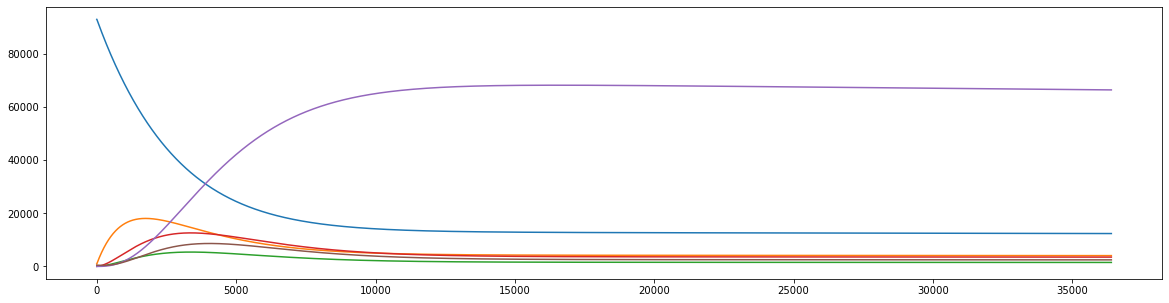

In [551]:
yy = pd.DataFrame(ans1.y).T
tt = np.linspace(start1, end1, len(yy) + 1)
plt.figure(figsize=(20,5))
plt.plot(yy)

In [555]:
x0 = [93000., 1000., 50., 50., 0., 500.]
start2 = 1
end2 = 365
a2 = 10000.
days2 = 5
ans2 = getSeir(x0, start2, end2, a2, days2)

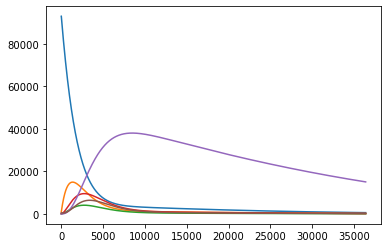

In [556]:
yy1 = pd.DataFrame(ans2.y).T
plt.plot(yy1)

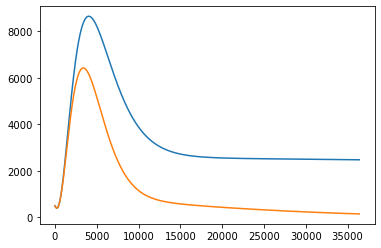

In [562]:
plt.plot(yy[5])
plt.plot(yy1[5])

0.0005722963079511213